### Michela Mallick - LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms

In [2]:
# Load the CSV file(s) as reviews.
reviews = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Any missing values?
reviews.isna().sum()

gender                    0
age                       0
remuneration (k£)         0
spending_score (1-100)    0
loyalty_points            0
education                 0
language                  0
platform                  0
product                   0
review                    0
summary                   0
dtype: int64

### Since there are no missing value we don't have to replace those with 0
### df.fillna(0, inplace=True)

In [4]:
# Explore the data.
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [5]:
# Descriptive statistics.
reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [6]:
# Drop unnecessary columns.
reviews = reviews.drop(['language', 'platform'], axis=1)

# View column names.
# reviews.head()
list(reviews.columns)

['gender',
 'age',
 'remuneration (k£)',
 'spending_score (1-100)',
 'loyalty_points',
 'education',
 'product',
 'review',
 'summary']

## 3. Rename columns

In [7]:
# Rename the column headers.
reviews.rename(columns={'remuneration (k£)': 'remuneration',
                  'spending_score (1-100)': 'spending_score'}, inplace=True)

# View column names.
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [8]:
# Create a CSV file as output.
reviews.to_csv('reviews.csv', index=False)

In [9]:
# Import new CSV file with Pandas.
reviews = pd.read_csv('reviews.csv')

# View DataFrame.
reviews.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

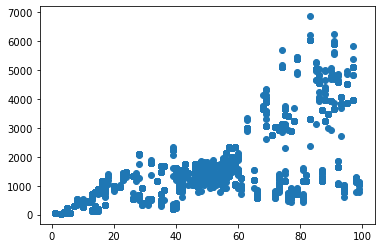

In [10]:
# Independent variable.
X = reviews["spending_score"]

# Dependent variable.
y = reviews["loyalty_points"]

# Check for linearity.
plt.scatter(X,y)

In [11]:
# OLS model and summary.
f = 'y ~ X'
test = ols(f, data = reviews).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.92e-263
Time:                        09:30:44   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)  

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -75.052663
X            33.061693
dtype: float64
Standard errors:  Intercept    45.930554
X             0.814419
dtype: float64
Predicted values:  [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


### Notes about the OLS summary

* **R-squared : 45% of the total variability of y (loyalty), is explained by the variability of X (spending score)**
* **F-stat: as the probability of F stat is smaller than a threshold (usually 0.05), the set of variables of the regression model are significant**
* **X: The coefficient of X describes the slope of the regression line: 33.0617**
   * **The t-value tests the hypothesis that the slope is significant or not. If the corresponding probability is small (typically smaller than 0.05) the slope is significant. In this case, the probability of the t-value is zero, thus the estimated slope is significant.**
   * **The last two numbers describe the 95% confidence interval of the true xcoefficient (31.464 - 34.659)**

In [13]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = -75.052663 + 33.061693 * X

# View the output.
y_pred

0       1214.353364
1       2602.944470
2        123.317495
3       2470.697698
4       1247.415057
           ...     
1995    2206.204154
1996     189.440881
1997    2933.561400
1998     453.934425
1999     189.440881
Name: spending_score, Length: 2000, dtype: float64

Text(0.5, 1.0, 'Spending score vs Loyalty Point')

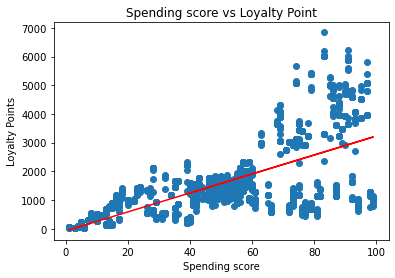

In [14]:
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='red')

# Label the plot
plt.xlabel('Spending score')
plt.ylabel('Loyalty Points')
plt.title('Spending score vs Loyalty Point')


## 5b) renumeration vs loyalty

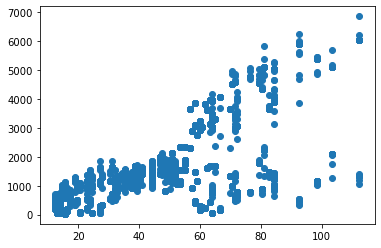

In [15]:
# Independent variable.
X = reviews["remuneration"]

# Dependent variable.
y = reviews["loyalty_points"]

# Check for linearity
plt.scatter(X,y)

In [16]:
# OLS model and summary.
f = 'y ~ X'
test = ols(f, data = reviews).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Fri, 23 Dec 2022   Prob (F-statistic):          2.43e-209
Time:                        09:30:44   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
# Extract the estimated parameters.
print("Parameters: ", test.params)  

# Extract the standard errors.
print("Standard errors: ", test.bse)

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept   -65.686513
X            34.187825
dtype: float64
Standard errors:  Intercept    52.170717
X             0.977925
dtype: float64
Predicted values:  [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [18]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = -65.686513 + 34.187825 * X

# View the output.
y_pred

0        354.823735
1        354.823735
2        382.857751
3        382.857751
4        410.891767
           ...     
1995    2821.817186
1996    3102.157351
1997    3102.157351
1998    3298.395467
1999    3102.157351
Name: remuneration, Length: 2000, dtype: float64

Text(0.5, 1.0, 'Remuneration vs Loyalty Point')

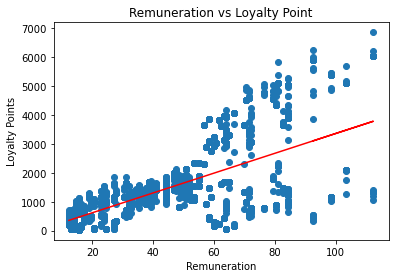

In [19]:
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='red')

# Label the plot
plt.xlabel('Remuneration')
plt.ylabel('Loyalty Points')
plt.title('Remuneration vs Loyalty Point')

### 5c) age vs loyalty

In [20]:
# Independent variable.
X = reviews["age"]

# Dependent variable.
y = reviews["loyalty_points"]

# OLS model and summary.
f = 'y ~ X'
test = ols(f, data = reviews).fit()
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Fri, 23 Dec 2022   Prob (F-statistic):             0.0577
Time:                        09:30:44   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
# Extract the estimated parameters.
print("Parameters: ", test.params)

# Extract the standard errors.
print("Standard errors: ", test.bse) 

# Extract the predicted values.
print("Predicted values: ", test.predict())

Parameters:  Intercept    1736.517739
X              -4.012805
dtype: float64
Standard errors:  Intercept    88.248731
X             2.113177
dtype: float64
Predicted values:  [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [22]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = 1736.517739 -4.012805 * X

# View the output.
y_pred

0       1664.287249
1       1644.223224
2       1648.236029
3       1636.197614
4       1604.095174
           ...     
1995    1588.043954
1996    1563.967124
1997    1600.082369
1998    1600.082369
1999    1608.107979
Name: age, Length: 2000, dtype: float64

Text(0.5, 1.0, 'Age vs Loyalty Point')

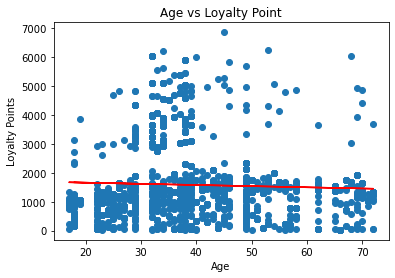

In [23]:
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='red')

# Label the plot
plt.xlabel('Age')
plt.ylabel('Loyalty Points')
plt.title('Age vs Loyalty Point')

## 6. Observations and insights

**Spending score and remuneration appear certainly correlated with loyalty.**

Although the F-stat values indicates that the set of variables of the regression model are significant, further data wrangling (i.e. fitting a WLS model) could provide a more accurate line.
On fitting the linear regression we assume that the data is homoscedastic: although the graph suggests that there might be some heteroscedasticity in the data, the Bre-Pagan test confirm the assumption. 

**Age instead don't seem correlated**

The scatter plot data distribution doesn't show a relationship between age and loyalty. 
The probability of F-stat is greater than 0.5, meaning the set of variables are not significant.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [24]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [25]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('reviews.csv')

# View DataFrame.
print(df2.info())
df2.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB
None


<bound method NDFrame.head of       gender  age  remuneration  spending_score  loyalty_points education  \
0       Male   18         12.30              39             210  graduate   
1       Male   23         12.30              81             524  graduate   
2     Female   22         13.12               6              40  graduate   
3     Female   25         13.12              77             562  graduate   
4     Female   33         13.94              40             366  graduate   
...      ...  ...           ...             ...             ...       ...   
1995  Female   37         84.46              69            4031       PhD   
1996  Female   43         92.66               8             539       PhD   
1997    Male   34         92.66              91            5614  graduate   
1998    Male   34         98.40              16            1048       PhD   
1999    Male   32         92.66               8             479       PhD   

      product                                

In [26]:
# Drop unnecessary columns.
df2=df2[['remuneration', 'spending_score']]

# View DataFrame.
df2

,remuneration,spending_score
0,12.30,39
1,12.30,81
2,13.12,6
3,13.12,77
4,13.94,40
...,...,...
1995,84.46,69
1996,92.66,8
1997,92.66,91
1998,98.40,16


In [27]:
# Explore the data.
print(df2.info())
df2.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   remuneration    2000 non-null   float64
 1   spending_score  2000 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 31.4 KB
None


<bound method NDFrame.head of       remuneration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]>

In [28]:
# Descriptive statistics.
df2.describe()

,remuneration,spending_score
count,2000.000000,2000.000000
mean,48.079060,50.000000
std,23.123984,26.094702
min,12.300000,1.000000
25%,30.340000,32.000000
50%,47.150000,50.000000
75%,63.960000,73.000000
max,112.340000,99.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

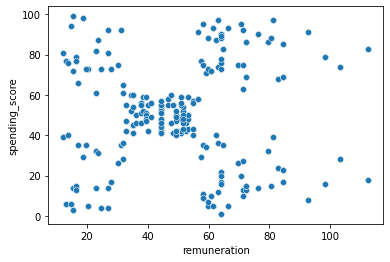

In [29]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration',
               y='spending_score', data=df2)

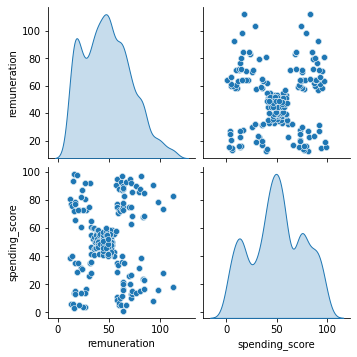

In [30]:
# Create a pairplot with Seaborn.
x = df2
sns.pairplot(df2, vars=x, diag_kind='kde')

## 3. Elbow and silhoutte methods

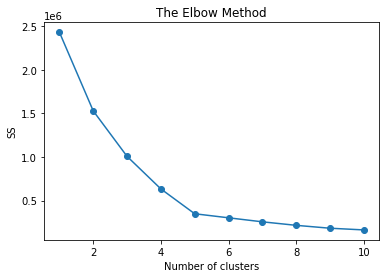

In [31]:
# Determine the number of clusters: Elbow method.
from sklearn.cluster import KMeans
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,
                    init='k-means++',
                    max_iter=500,
                    n_init=10,
                    random_state=42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

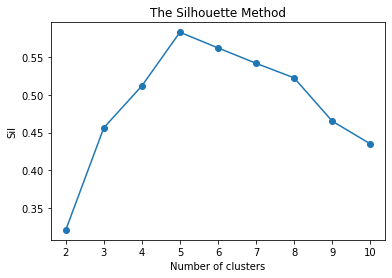

In [32]:
# Determine the number of clusters: Silhouette method.
from sklearn.metrics import silhouette_score
sil = []
kmax = 10
for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters=k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric='euclidean'))
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

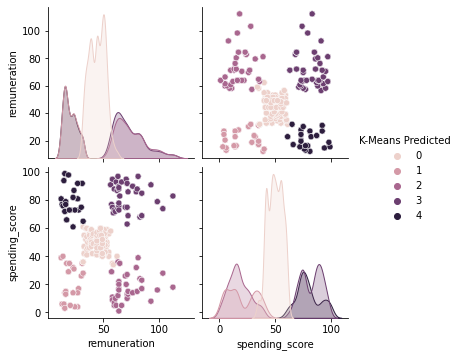

In [33]:
# Use 5 cluster
kmeans = KMeans(n_clusters=5,
               max_iter=15000,
               init='k-means++',
               random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters
sns.pairplot(x,
            hue='K-Means Predicted',
            diag_kind='kde')

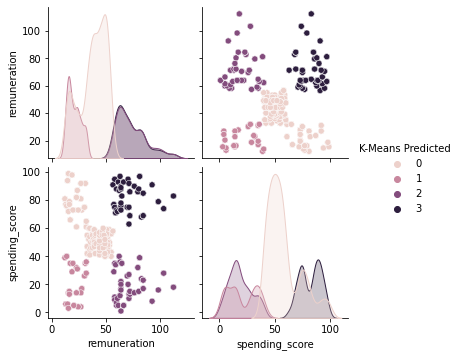

In [34]:
# Use 4 cluster
kmeans = KMeans(n_clusters=4,
               max_iter=15000,
               init='k-means++',
               random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters
sns.pairplot(x,
            hue='K-Means Predicted',
            diag_kind='kde')

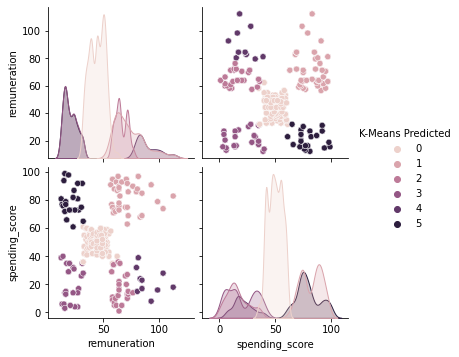

In [35]:
# Use 6 cluster
kmeans = KMeans(n_clusters=6,
               max_iter=15000,
               init='k-means++',
               random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters
sns.pairplot(x,
            hue='K-Means Predicted',
            diag_kind='kde')

## 5. Fit final model and justify your choice

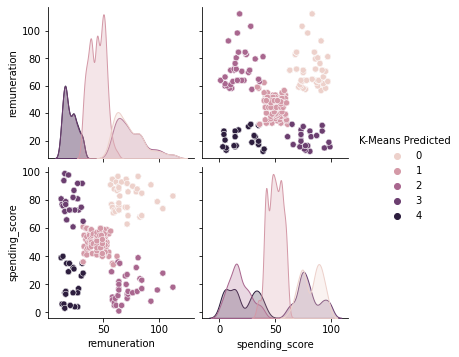

In [36]:
# Apply the final model.
kmeans = KMeans(n_clusters=5,
               max_iter=15000,
               init='k-means++',
               random_state=0).fit(x)
clusters = kmeans.labels_
x['K-Means Predicted'] = clusters
sns.pairplot(x,
            hue='K-Means Predicted',
            diag_kind='kde')

In [37]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

1    774
0    356
2    330
4    271
3    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

,remuneration,spending_score,K-Means Predicted
0,12.30,39,4
1,12.30,81,3
2,13.12,6,4
3,13.12,77,3
4,13.94,40,4
...,...,...,...
1995,84.46,69,0
1996,92.66,8,2
1997,92.66,91,0
1998,98.40,16,2


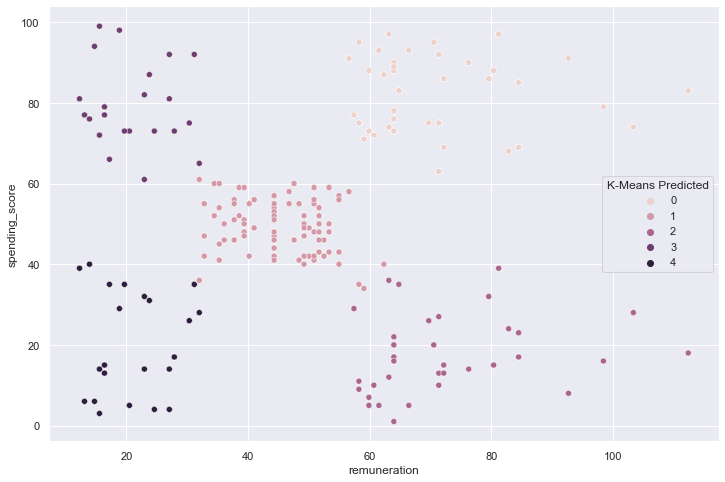

In [38]:
# Visualising the clusters.
# Set plot size
sns.set(rc = {'figure.figsize':(12,8)})
# Create a scatterplot
sns.scatterplot(x='remuneration', 
               y='spending_score',
               data=x,
               hue='K-Means Predicted')

# View the DataFrame.
x

## 7. Discuss: Insights and observations

The K means clustering clearly identify within the client base 5 clusters, which also look quite distinct.
Further analysis of these clusters should identify the common traits of these groups and provide insights for more targeted marketing campaigns.
It is also interesting and relevant to observe that the cluster 0 is substantially bigger than the others (at least double the size) and it should be certainly the first one to be observed.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [75]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import wordcloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [76]:
# Load the data set as df3.
df3 = pd.read_csv('reviews.csv')

# View DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [77]:
# Explore data set.
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          2000 non-null   object 
 1   age             2000 non-null   int64  
 2   remuneration    2000 non-null   float64
 3   spending_score  2000 non-null   int64  
 4   loyalty_points  2000 non-null   int64  
 5   education       2000 non-null   object 
 6   product         2000 non-null   int64  
 7   review          2000 non-null   object 
 8   summary         2000 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 140.8+ KB


In [78]:
# Keep necessary columns. Drop unnecessary columns.
df3=df3[['review', 'summary']]

# View DataFrame.
df3

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap
...,...,...
1995,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Great game. Did not think I would like it whe...,Super fun
1997,Great game for all.........\nKeeps the mind ni...,Great Game
1998,fun game!,Four Stars


In [79]:
# Determine if there are any missing values.
df3.isna().sum()

review     0
summary    0
dtype: int64

### There are no missing value on our dataframe so we can continue our analysis

## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

In [80]:
# Review: Change all to lower case and join with a space.
df3['review'] = df3['review'].apply(
    lambda x: " ".join(x.lower() for x in x.split()))
df3['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [81]:
# Summary: Change all to lower case and join with a space.
df3['summary'] = df3['summary'].apply(
    lambda x: " ".join(x.lower() for x in x.split()))
df3['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [82]:
# Replace all the punctuations in review column.
df3['review'] = df3['review'].str.replace('[^\w\s]', '')

# View output.
df3['review'].head()

0    when it comes to a dms screen the space on the...
1    an open letter to galeforce9 your unpainted mi...
2    nice art nice printing why two panels are fill...
3    amazing buy bought it as a gift for our new dm...
4    as my review of gf9s previous screens these we...
Name: review, dtype: object

In [83]:
# Replace all the puncuations in summary column.
df3['summary'] = df3['summary'].str.replace('[^\w\s]', '')

# View output.
df3['summary'].head()

0    the fact that 50 of this space is wasted on ar...
1    another worthless dungeon masters screen from ...
2                       pretty but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [84]:
# Check duplicates in both columns.
print(df3.review.duplicated().sum())
print(df3.summary.duplicated().sum())

50
649


In [85]:
# Drop duplicates in both columns.
df4 = df3.drop_duplicates(subset=['review', 'summary'])
df4.reset_index(inplace=True)

# View DataFrame.
df4.head()

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap


## 3. Tokenise and create wordclouds

In [86]:
# Create new DataFrame (copy DataFrame).
df5=df4

# View DataFrame.
df5['review']

0       when it comes to a dms screen the space on the...
1       an open letter to galeforce9 your unpainted mi...
2       nice art nice printing why two panels are fill...
3       amazing buy bought it as a gift for our new dm...
4       as my review of gf9s previous screens these we...
                              ...                        
1956    the perfect word game for mixed ages with mom ...
1957    great game did not think i would like it when ...
1958             great game for all keeps the mind nimble
1959                                             fun game
1960    this game is fun a lot like scrabble without a...
Name: review, Length: 1961, dtype: object

In [87]:
# String all the comments together in a single variable.
# Create an empty string variable.
all_review = ''
all_summary = ''

for i in range(df5.shape[0]):
    all_review = all_review + df5['review'][i]
    all_summary = all_summary + df5['summary'][i]

# View DataFrame.
df5

,index,review,summary
0,0,when it comes to a dms screen the space on the...,the fact that 50 of this space is wasted on ar...
1,1,an open letter to galeforce9 your unpainted mi...,another worthless dungeon masters screen from ...
2,2,nice art nice printing why two panels are fill...,pretty but also pretty useless
3,3,amazing buy bought it as a gift for our new dm...,five stars
4,4,as my review of gf9s previous screens these we...,money trap
...,...,...,...
1956,1995,the perfect word game for mixed ages with mom ...,the perfect word game for mixed ages with mom
1957,1996,great game did not think i would like it when ...,super fun
1958,1997,great game for all keeps the mind nimble,great game
1959,1998,fun game,four stars


In [88]:
# Tokenise the words.
df5['tokens_review'] = df5['review'].apply(word_tokenize)
df5['tokens_summary'] = df5['summary'].apply(word_tokenize)

# Preview data.
print(df5['tokens_review'].head())
print(df5['tokens_summary'].head())

0    [when, it, comes, to, a, dms, screen, the, spa...
1    [an, open, letter, to, galeforce9, your, unpai...
2    [nice, art, nice, printing, why, two, panels, ...
3    [amazing, buy, bought, it, as, a, gift, for, o...
4    [as, my, review, of, gf9s, previous, screens, ...
Name: tokens_review, dtype: object
0    [the, fact, that, 50, of, this, space, is, was...
1    [another, worthless, dungeon, masters, screen,...
2                 [pretty, but, also, pretty, useless]
3                                        [five, stars]
4                                        [money, trap]
Name: tokens_summary, dtype: object


In [89]:
# Define an empty list of tokens.
all_tokens_review = []
all_tokens_summary = []

for i in range(df5.shape[0]):
    # Add each token to the list.
    all_tokens_review = all_tokens_review + df5['tokens_review'][i]
    all_tokens_summary = all_tokens_summary + df5['tokens_summary'][i]

In [90]:
# Review: Create a word cloud.
# !pip install WordCloud to install the library
from wordcloud import WordCloud

sns.set(color_codes=True)
word_cloud_review = WordCloud(width=1600, height=900,
                       background_color='white',
                       colormap='plasma',
                       stopwords='none',
                       min_font_size=10).generate(all_review)

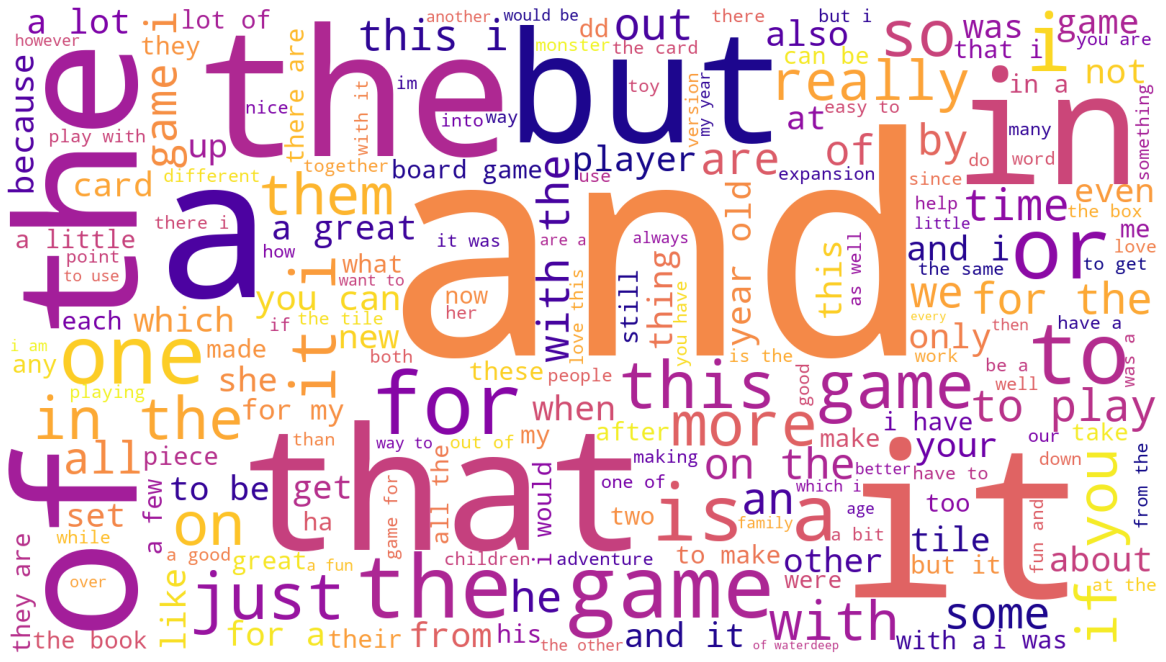

In [91]:
# Review: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(word_cloud_review)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [92]:
# Summary: Create a word cloud.
sns.set(color_codes=True)
word_cloud_summary = WordCloud(width=1600, height=900,
                       background_color='white',
                       colormap='plasma',
                       stopwords='none',
                       min_font_size=10).generate(all_summary)

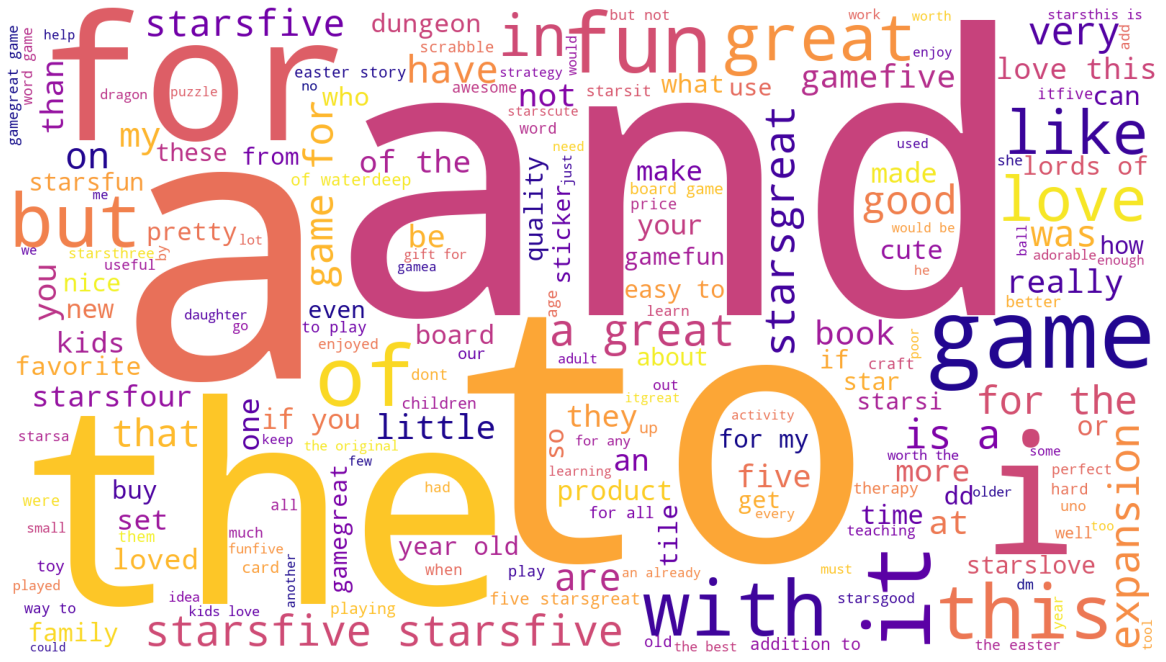

In [93]:
# Summary: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(word_cloud_summary)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [94]:
# Determine the frequency distribution.
fdist_review = FreqDist(all_tokens_review)
fdist_summary = FreqDist(all_tokens_summary)

fdist_review

FreqDist({'the': 5451, 'and': 3233, 'to': 3162, 'a': 3160, 'of': 2488, 'i': 2090, 'it': 2083, 'is': 1782, 'this': 1776, 'game': 1671, ...})

In [95]:
fdist_summary

FreqDist({'stars': 427, 'five': 342, 'game': 319, 'great': 295, 'the': 261, 'a': 240, 'for': 232, 'fun': 218, 'to': 192, 'and': 168, ...})

### 4b) Remove alphanumeric characters and stopwords

In [96]:
# I'll conduct the removal of alphanumeric characters and stopwords 
# after joining the two token lists from Review and Summary data
all_tokens = all_tokens_review + all_tokens_summary

# Delete all the alpanum:
tokens = [word for word in all_tokens if word.isalnum()]

# Create a set of English stop words.
english_stopwords = set(stopwords.words('english'))

In [97]:
# Remove all the stopwords
tokens1 = [x for x in tokens if x.lower() not in english_stopwords]

# Define an empty string variable.
tokens1_string = ''

for value in tokens:
    # Add each filtered token word to the string.
    tokens1_string = tokens1_string + value + ' '

### 4c) Create wordcloud without stopwords

In [98]:
# Create a wordcloud without stop words.
wordcloud_all= WordCloud(width=1600, height=900,
                             background_color='white',
                             colormap='plasma',
                             min_font_size=10).generate(tokens1_string)

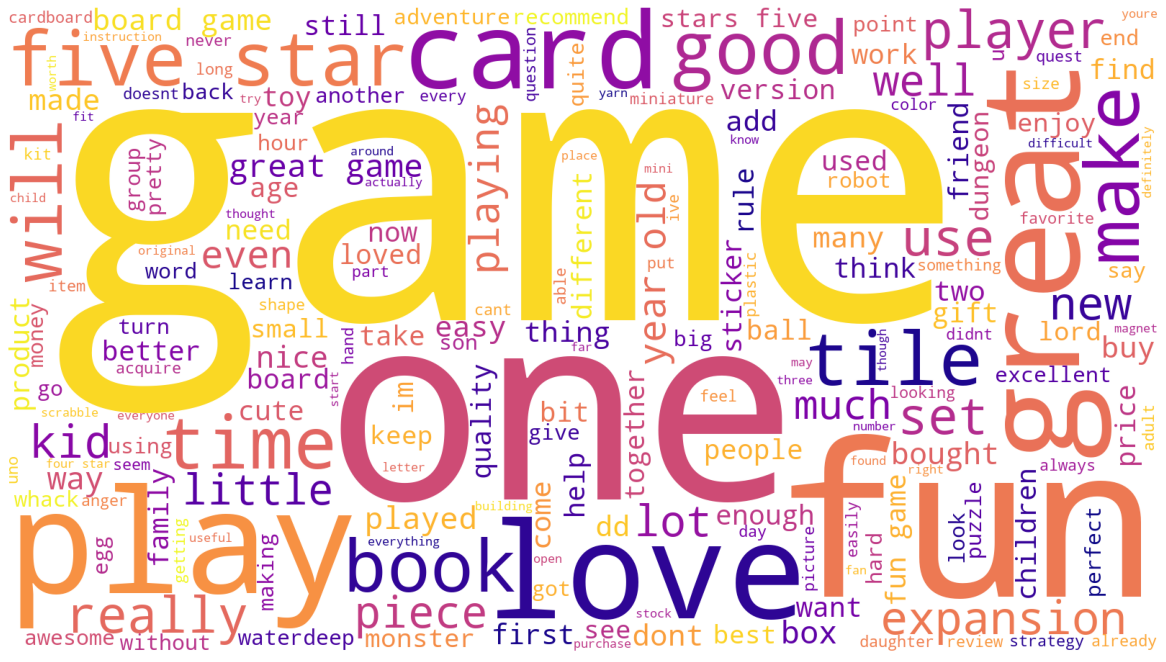

In [99]:
# Review data
# Plot the wordcloud image.
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_all) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
plt.show()

### 4d) Identify 15 most common words and polarity

In [100]:
# Determine the 15 most common words.
fdist= FreqDist(tokens1)
fdist

FreqDist({'game': 1990, 'great': 875, 'fun': 770, 'one': 568, 'play': 528, 'like': 468, 'stars': 464, 'love': 416, 'good': 381, 'five': 362, ...})

In [101]:
from collections import Counter
# Generate a DataFrame from Counter 
counts = pd.DataFrame(Counter(tokens1).most_common(15),
                     columns=['Word', 'Frequency']).set_index('Word')
counts

,Frequency
Word,
game,1990
great,875
fun,770
one,568
play,528
like,468
stars,464
love,416
good,381


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [102]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

def generate_subjectivity(comment):
    '''Extract subjectivity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[1]

In [103]:
# Determine polarity of both columns. 
# Review column
df5['polarity_review']= df5['review'].apply(generate_polarity)
# Summary column
df5['polarity_summary']= df5['summary'].apply(generate_polarity)

# View output.
print(df5['polarity_review'].head())
df5['polarity_summary'].head()

0   -0.036111
1    0.035952
2    0.116640
3    0.578788
4   -0.316667
Name: polarity_review, dtype: float64


0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: polarity_summary, dtype: float64

In [104]:
# Determine subjectivity score of both columns. 
# Review column
df5['subjectivity_review']= df5['review'].apply(generate_subjectivity)
# Summary column
df5['subjectivity_summary']= df5['summary'].apply(generate_subjectivity)

# View output.
print(df5['subjectivity_review'].head())
df5['subjectivity_summary'].head()

0    0.486111
1    0.442976
2    0.430435
3    0.784848
4    0.316667
Name: subjectivity_review, dtype: float64


0    0.500000
1    0.900000
2    0.733333
3    0.000000
4    0.000000
Name: subjectivity_summary, dtype: float64

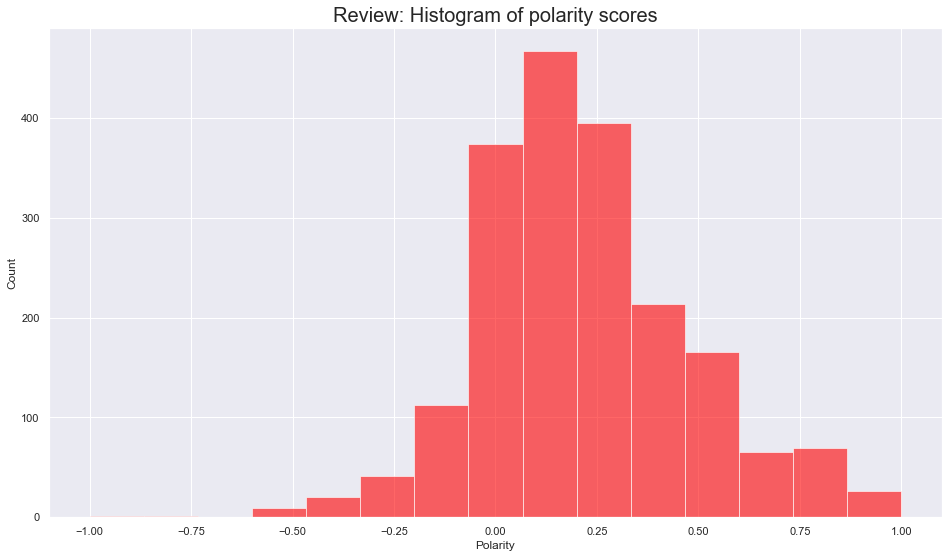

In [107]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins=15
plt.figure(figsize=(16,9))
# Define the bars
n, bins, patches = plt.hist(df5['polarity_review'], num_bins, facecolor='red', alpha=0.6)
# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Review: Histogram of polarity scores', fontsize=20)

plt.show()

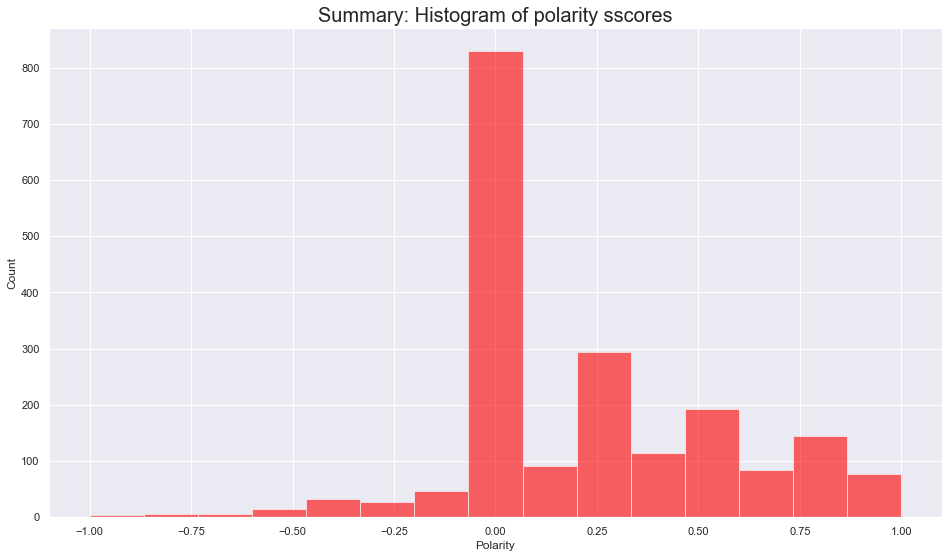

In [106]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
num_bins=15
plt.figure(figsize=(16,9))
# Define the bars
n, bins, patches = plt.hist(df5['polarity_summary'], num_bins, facecolor='red', alpha=0.6)
# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Summary: Histogram of polarity sscores', fontsize=20)

plt.show()

## 6. Identify top 20 positive and negative reviews and summaries respectively

In [71]:
# Top 20 negative reviews.
negative_sentiment_review = df5.nsmallest(10, 'polarity_review')
negative_sentiment_review = negative_sentiment_review[['review', 'polarity_review']]

# View output.
negative_sentiment_review

,review,polarity_review
207,booo unles you are patient know how to measure...,-1.000000
181,incomplete kit very disappointing,-0.780000
1773,im sorry i just find this product to be boring...,-0.583333
362,one of my staff will be using this game soon s...,-0.550000
116,i bought this as a christmas gift for my grand...,-0.500000
226,this was a gift for my daughter i found it dif...,-0.500000
229,i found the directions difficult,-0.500000
289,instructions are complicated to follow,-0.500000
300,difficult,-0.500000
1501,expensive for what you get,-0.500000


In [72]:
# Top 20 negative summaries.
negative_sentiment_summary = df5.nsmallest(10, 'polarity_summary')
negative_sentiment_summary = negative_sentiment_summary[['summary', 'polarity_summary']]

# View output.
negative_sentiment_summary

,summary,polarity_summary
21,the worst value ive ever seen,-1.00
207,boring unless you are a craft person which i am,-1.00
819,boring,-1.00
1148,before this i hated running any rpg campaign d...,-0.90
1,another worthless dungeon masters screen from ...,-0.80
143,disappointed,-0.75
623,disappointed,-0.75
785,disappointed,-0.75
1591,disappointed,-0.75
361,promotes anger instead of teaching calming met...,-0.70


In [73]:
# Top 20 positive reviews.
positive_sentiment_review = df5.nlargest(10, 'polarity_review')
positive_sentiment_review = positive_sentiment_review[['review', 'polarity_review']]

# View output.
positive_sentiment_review

,review,polarity_review
7,came in perfect condition,1.0
164,awesome book,1.0
193,awesome gift,1.0
489,excellent activity for teaching selfmanagement...,1.0
517,perfect just what i ordered,1.0
583,wonderful product,1.0
601,delightful product,1.0
613,wonderful for my grandson to learn the resurre...,1.0
782,perfect,1.0
923,awesome,1.0


In [74]:
# Top 20 positive summaries.
positive_sentiment_summary = df5.nlargest(10, 'polarity_summary')
positive_sentiment_summary = positive_sentiment_summary[['summary', 'polarity_summary']]


# View output.
positive_sentiment_summary

,summary,polarity_summary
6,best gm screen ever,1.0
28,wonderful designs,1.0
32,perfect,1.0
80,theyre the perfect size to keep in the car or ...,1.0
133,perfect for preschooler,1.0
139,awesome sticker activity for the price,1.0
160,awesome book,1.0
162,he was very happy with his gift,1.0
186,awesome,1.0
209,awesome and welldesigned for 9 year olds,1.0


# 